In [78]:
# importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

**Reading the `appl_df` dataframe**

In [79]:
df_1 = pd.read_csv('appl_df.csv')
df_1.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,Age,Years_Employed
0,0,100002,Y,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,1,0,1.0,2,2,Business Entity Type 3,25,2
1,1,100003,N,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,1,0,2.0,1,1,School,45,3
2,2,100004,N,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,1,0,1.0,2,2,Government,52,1
3,3,100006,N,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,1,0,2.0,2,2,Business Entity Type 3,52,8
4,4,100007,N,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,1,0,1.0,2,2,Religion,54,8


In [80]:
df_1.drop(columns = ['Unnamed: 0'], inplace = True)

**Reading the `prev_appl_df` dataframe**

In [81]:
df_2 = pd.read_csv('prev_appl_df.csv')
df_2.head()

,Unnamed: 0,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,NAME_YIELD_GROUP
0,0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,73,Cash through the bank,XAP,Repeater,Mobile,POS,Country-wide,12.0,middle
1,1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,164,XNA,XAP,Repeater,XNA,Cash,Contact center,36.0,low_action
2,2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,301,Cash through the bank,XAP,Repeater,XNA,Cash,Credit and cash offices,12.0,high
3,3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,512,Cash through the bank,XAP,Repeater,XNA,Cash,Credit and cash offices,12.0,middle
4,4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,781,Cash through the bank,HC,Repeater,XNA,Cash,Credit and cash offices,24.0,high


In [82]:
df_2.drop(columns = ['Unnamed: 0'], inplace = True)

In [83]:
df_2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,NAME_YIELD_GROUP
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,73,Cash through the bank,XAP,Repeater,Mobile,POS,Country-wide,12.0,middle
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,164,XNA,XAP,Repeater,XNA,Cash,Contact center,36.0,low_action
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,301,Cash through the bank,XAP,Repeater,XNA,Cash,Credit and cash offices,12.0,high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,512,Cash through the bank,XAP,Repeater,XNA,Cash,Credit and cash offices,12.0,middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,781,Cash through the bank,HC,Repeater,XNA,Cash,Credit and cash offices,24.0,high


**Merging both dataframe on the basis of where id matches in both the dataframes, so that unecessary rows prone to NULL values doen't get counted**

In [84]:
df_merged = df_1.merge(df_2, on = 'SK_ID_CURR', how = 'inner')

In [85]:
# Checking the structure of the dataframe
df_merged.shape

(856761, 42)

## NULL value check

In [86]:
df_merged.isnull().sum()/len(df_merged) * 100

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE_x           0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT_x                   0.0
AMT_ANNUITY_x                  0.0
AMT_GOODS_PRICE_x              0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
FLAG_MOBIL                     0.0
FLAG_EMAIL                     0.0
CNT_FAM_MEMBERS                0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
ORGANIZATION_TYPE              0.0
Age                            0.0
Years_Employed                 0.0
SK_ID_PREV                     0.0
NAME_CONTRACT_TYPE_y           0.0
AMT_ANNUITY_y                  0.0
AMT_APPLICATION     

## Duplicated rows check

In [87]:
df_merged[df_merged.duplicated()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,Age,Years_Employed,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,NAME_YIELD_GROUP


In [88]:
column_list = df_merged.columns.sort_values()

In [89]:
list(column_list)

['AMT_ANNUITY_x',
 'AMT_ANNUITY_y',
 'AMT_APPLICATION',
 'AMT_CREDIT_x',
 'AMT_CREDIT_y',
 'AMT_GOODS_PRICE_x',
 'AMT_GOODS_PRICE_y',
 'AMT_INCOME_TOTAL',
 'Age',
 'CHANNEL_TYPE',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'CNT_PAYMENT',
 'CODE_GENDER',
 'CODE_REJECT_REASON',
 'DAYS_BIRTH',
 'DAYS_DECISION',
 'DAYS_EMPLOYED',
 'FLAG_EMAIL',
 'FLAG_MOBIL',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CLIENT_TYPE',
 'NAME_CONTRACT_STATUS',
 'NAME_CONTRACT_TYPE_x',
 'NAME_CONTRACT_TYPE_y',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_GOODS_CATEGORY',
 'NAME_HOUSING_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_PAYMENT_TYPE',
 'NAME_PORTFOLIO',
 'NAME_YIELD_GROUP',
 'ORGANIZATION_TYPE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'SK_ID_CURR',
 'SK_ID_PREV',
 'TARGET',
 'Years_Employed']

To check if any column by chance is repeatative

In [90]:
for i in range(0, len(column_list)):
    count = 0
    for j in range(0, len(column_list)):
        if column_list[i] == column_list[j]:
            count += 1
        
    if count > 1:
        print(column_list[i])

In [91]:
# Getting a glimpse of the dataset
df_merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,Age,Years_Employed,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,NAME_YIELD_GROUP
0,100002,Y,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,1,0,1.0,2,2,Business Entity Type 3,25,2,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,Stone,24.0,low_normal
1,100003,N,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,1,0,2.0,1,1,School,45,3,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,Credit and cash offices,12.0,low_normal
2,100003,N,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,1,0,2.0,1,1,School,45,3,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,Stone,6.0,middle
3,100003,N,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,1,0,2.0,1,1,School,45,3,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,XAP,Approved,2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,Country-wide,12.0,middle
4,100004,N,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,1,0,1.0,2,2,Government,52,1,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,XAP,Approved,815,Cash through the bank,XAP,New,Mobile,POS,Regional / Local,4.0,middle


Droping unwanted columns

In [92]:
df_merged.drop(columns = ['SK_ID_CURR', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'SK_ID_PREV', 'FLAG_MOBIL', 'FLAG_EMAIL'], inplace = True)

In [93]:
df_merged.head()

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,Age,Years_Employed,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,NAME_YIELD_GROUP
0,Y,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1.0,2,2,Business Entity Type 3,25,2,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,Stone,24.0,low_normal
1,N,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,2.0,1,1,School,45,3,Cash loans,98356.995,900000.0,1035882.0,900000.0,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,Credit and cash offices,12.0,low_normal
2,N,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,2.0,1,1,School,45,3,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,Stone,6.0,middle
3,N,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,2.0,1,1,School,45,3,Consumer loans,6737.310,68809.5,68053.5,68809.5,XAP,Approved,2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,Country-wide,12.0,middle
4,N,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1.0,2,2,Government,52,1,Consumer loans,5357.250,24282.0,20106.0,24282.0,XAP,Approved,815,Cash through the bank,XAP,New,Mobile,POS,Regional / Local,4.0,middle


Let's analyse the **TARGET** column

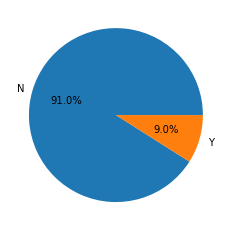

In [94]:
plt.pie(df_merged.TARGET.value_counts(),
       labels = df_merged.TARGET.value_counts().index, 
       autopct = '%1.01f%%')

plt.show()

There are columns which are present in both the datasets, one on the left marked as ***_x*** and the right with ***_y***

In [95]:
df_merged.reindex(sorted(df_merged.columns), axis=1)


,AMT_ANNUITY_x,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_x,AMT_CREDIT_y,AMT_GOODS_PRICE_x,AMT_GOODS_PRICE_y,AMT_INCOME_TOTAL,Age,CHANNEL_TYPE,CNT_CHILDREN,CNT_FAM_MEMBERS,CNT_PAYMENT,CODE_GENDER,CODE_REJECT_REASON,DAYS_DECISION,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_CASH_LOAN_PURPOSE,NAME_CLIENT_TYPE,NAME_CONTRACT_STATUS,NAME_CONTRACT_TYPE_x,NAME_CONTRACT_TYPE_y,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_GOODS_CATEGORY,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,NAME_PAYMENT_TYPE,NAME_PORTFOLIO,NAME_YIELD_GROUP,ORGANIZATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,TARGET,Years_Employed
0,24700.5,9251.775,179055.0,406597.5,179055.0,351000.0,179055.0,202500.0,25,Stone,0,1.0,24.0,M,XAP,606,N,Y,XAP,New,Approved,Cash loans,Consumer loans,Secondary / secondary special,Single / not married,Vehicles,House / apartment,Working,XNA,POS,low_normal,Business Entity Type 3,2,2,Y,2
1,35698.5,98356.995,900000.0,1293502.5,1035882.0,1129500.0,900000.0,270000.0,45,Credit and cash offices,0,2.0,12.0,F,XAP,746,N,N,XNA,Repeater,Approved,Cash loans,Cash loans,Higher education,Married,XNA,House / apartment,State servant,XNA,Cash,low_normal,School,1,1,N,3
2,35698.5,64567.665,337500.0,1293502.5,348637.5,1129500.0,337500.0,270000.0,45,Stone,0,2.0,6.0,F,XAP,828,N,N,XAP,Refreshed,Approved,Cash loans,Consumer loans,Higher education,Married,Furniture,House / apartment,State servant,Cash through the bank,POS,middle,School,1,1,N,3
3,35698.5,6737.310,68809.5,1293502.5,68053.5,1129500.0,68809.5,270000.0,45,Country-wide,0,2.0,12.0,F,XAP,2341,N,N,XAP,Refreshed,Approved,Cash loans,Consumer loans,Higher education,Married,Consumer Electronics,House / apartment,State servant,Cash through the bank,POS,middle,School,1,1,N,3
4,6750.0,5357.250,24282.0,135000.0,20106.0,135000.0,24282.0,67500.0,52,Regional / Local,0,1.0,4.0,M,XAP,815,Y,Y,XAP,New,Approved,Revolving loans,Consumer loans,Secondary / secondary special,Single / not married,Mobile,House / apartment,Working,Cash through the bank,POS,middle,Government,2,2,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856756,49117.5,16400.610,229500.0,675000.0,254340.0,675000.0,229500.0,157500.0,46,Credit and cash offices,0,2.0,24.0,F,XAP,648,N,N,XNA,Repeater,Approved,Cash loans,Cash loans,Higher education,Married,XNA,House / apartment,Commercial associate,Cash through the bank,Cash,middle,Business Entity Type 3,1,1,N,4
856757,49117.5,2250.000,45000.0,675000.0,45000.0,675000.0,45000.0,157500.0,46,Country-wide,0,2.0,0.0,F,HC,456,N,N,XAP,Repeater,Refused,Cash loans,Revolving loans,Higher education,Married,XNA,House / apartment,Commercial associate,XNA,Cards,XNA,Business Entity Type 3,1,1,N,4
856758,49117.5,30737.655,765000.0,675000.0,1067940.0,675000.0,765000.0,157500.0,46,Credit and cash offices,0,2.0,60.0,F,HC,171,N,N,Repairs,Repeater,Refused,Cash loans,Cash loans,Higher education,Married,XNA,House / apartment,Commercial associate,Cash through the bank,Cash,low_normal,Business Entity Type 3,1,1,N,4
856759,49117.5,54022.140,1170000.0,675000.0,1271929.5,675000.0,1170000.0,157500.0,46,AP+ (Cash loan),0,2.0,36.0,F,XAP,787,N,N,XNA,Repeater,Approved,Cash loans,Cash loans,Higher education,Married,XNA,House / apartment,Commercial associate,Cash through the bank,Cash,low_normal,Business Entity Type 3,1,1,N,4


The columns which are present in the x datasheet and also in the y datasheet, let's compare them to understand more.

- `AMT_ANNUITY`: Change in Annuity of present datasheet compared to previous

In [96]:
df_annuity = df_merged[['AMT_ANNUITY_x', 'AMT_ANNUITY_y']]

In [97]:
df_annuity['change_annuity_percent'] = df_annuity['AMT_ANNUITY_x']/df_annuity['AMT_ANNUITY_y']*100 - 100

In [98]:
df_annuity

,AMT_ANNUITY_x,AMT_ANNUITY_y,change_annuity_percent
0,24700.5,9251.775,166.981201
1,35698.5,98356.995,-63.705174
2,35698.5,64567.665,-44.711490
3,35698.5,6737.310,429.862809
4,6750.0,5357.250,25.997480
...,...,...,...
856756,49117.5,16400.610,199.485812
856757,49117.5,2250.000,2083.000000
856758,49117.5,30737.655,59.795860
856759,49117.5,54022.140,-9.078944


In [99]:
df_annuity.change_annuity_percent.sort_values()

502380   -96.089346
43344    -95.818725
402296   -95.797569
526056   -95.138353
552876   -95.111775
            ...    
7871            inf
317442          inf
665797          inf
568529          inf
129917          inf
Name: change_annuity_percent, Length: 856761, dtype: float64

In [100]:
df_annuity[df_annuity.change_annuity_percent == np.inf]

,AMT_ANNUITY_x,AMT_ANNUITY_y,change_annuity_percent
2652,25744.5,0.0,inf
2653,25744.5,0.0,inf
2654,25744.5,0.0,inf
2981,15228.0,0.0,inf
4009,39645.0,0.0,inf
...,...,...,...
854031,36184.5,0.0,inf
854235,14436.0,0.0,inf
854251,32643.0,0.0,inf
854681,15255.0,0.0,inf


In [101]:
df_annuity.iloc[7871, :]

AMT_ANNUITY_x             11709.0
AMT_ANNUITY_y                 0.0
change_annuity_percent        inf
Name: 7871, dtype: float64

In [102]:
df_annuity.change_annuity_percent.describe()

count    8.567610e+05
mean              inf
std               NaN
min     -9.608935e+01
25%      1.325858e+01
50%      1.155735e+02
75%      3.134454e+02
max               inf
Name: change_annuity_percent, dtype: float64

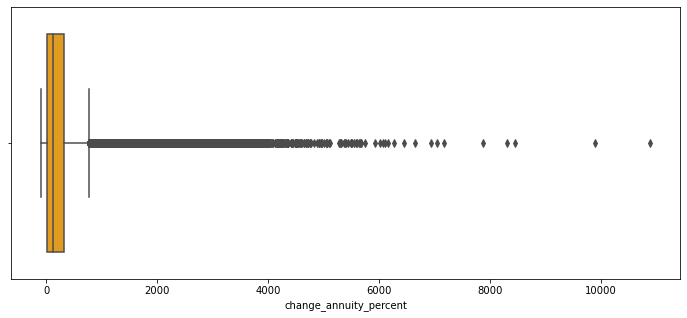

In [103]:
plt.figure(figsize = (12, 5))
sns.boxplot(df_annuity.change_annuity_percent, color = 'orange')

plt.show()

- `AMT_CREDIT`

In [104]:
df_merged.head()

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,Age,Years_Employed,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,NAME_YIELD_GROUP
0,Y,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1.0,2,2,Business Entity Type 3,25,2,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,Stone,24.0,low_normal
1,N,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,2.0,1,1,School,45,3,Cash loans,98356.995,900000.0,1035882.0,900000.0,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,Credit and cash offices,12.0,low_normal
2,N,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,2.0,1,1,School,45,3,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,Stone,6.0,middle
3,N,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,2.0,1,1,School,45,3,Consumer loans,6737.310,68809.5,68053.5,68809.5,XAP,Approved,2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,Country-wide,12.0,middle
4,N,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1.0,2,2,Government,52,1,Consumer loans,5357.250,24282.0,20106.0,24282.0,XAP,Approved,815,Cash through the bank,XAP,New,Mobile,POS,Regional / Local,4.0,middle


In [105]:
amt_credit = df_merged[['AMT_CREDIT_x', 'AMT_CREDIT_y']]

In [106]:
amt_credit.head()

,AMT_CREDIT_x,AMT_CREDIT_y
0,406597.5,179055.0
1,1293502.5,1035882.0
2,1293502.5,348637.5
3,1293502.5,68053.5
4,135000.0,20106.0


In [107]:
amt_credit['change_percent'] = amt_credit['AMT_CREDIT_x']/amt_credit['AMT_CREDIT_y'] * 100 - 100

In [108]:
amt_credit['change_percent'][amt_credit['change_percent'] == np.inf]

2652      inf
2653      inf
2654      inf
2981      inf
4009      inf
         ... 
854031    inf
854235    inf
854251    inf
854681    inf
855360    inf
Name: change_percent, Length: 811, dtype: float64

In [109]:
amt_credit[amt_credit['change_percent'] != np.inf]

,AMT_CREDIT_x,AMT_CREDIT_y,change_percent
0,406597.5,179055.0,127.079668
1,1293502.5,1035882.0,24.869676
2,1293502.5,348637.5,271.016457
3,1293502.5,68053.5,1800.714144
4,135000.0,20106.0,571.441361
...,...,...,...
856756,675000.0,254340.0,165.392781
856757,675000.0,45000.0,1400.000000
856758,675000.0,1067940.0,-36.794202
856759,675000.0,1271929.5,-46.931021


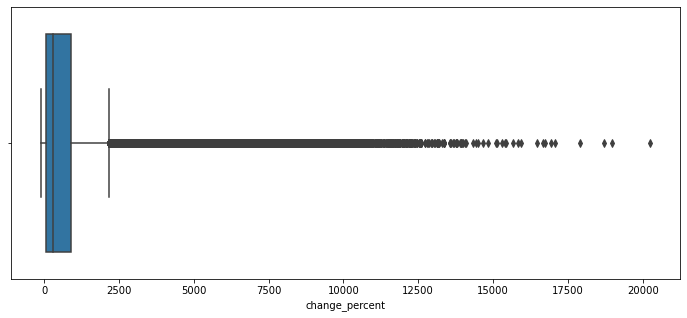

In [110]:
plt.figure(figsize = (12, 5))
sns.boxplot(amt_credit.change_percent[amt_credit['change_percent'] != np.inf])

plt.show()

In [111]:
amt_credit.iloc[2652, :]

AMT_CREDIT_x      324216.0
AMT_CREDIT_y           0.0
change_percent         inf
Name: 2652, dtype: float64

- `AMT_GOODS_PRICE`

In [112]:
df_merged[['AMT_GOODS_PRICE_x', 'AMT_GOODS_PRICE_y']]

,AMT_GOODS_PRICE_x,AMT_GOODS_PRICE_y
0,351000.0,179055.0
1,1129500.0,900000.0
2,1129500.0,337500.0
3,1129500.0,68809.5
4,135000.0,24282.0
...,...,...
856756,675000.0,229500.0
856757,675000.0,45000.0
856758,675000.0,765000.0
856759,675000.0,1170000.0


In [113]:
goods_price = df_merged[['AMT_GOODS_PRICE_x', 'AMT_GOODS_PRICE_y']]
goods_price['change_good_percent'] = goods_price['AMT_GOODS_PRICE_x']/goods_price['AMT_GOODS_PRICE_y']*100 - 100
goods_price.head()

,AMT_GOODS_PRICE_x,AMT_GOODS_PRICE_y,change_good_percent
0,351000.0,179055.0,96.029153
1,1129500.0,900000.0,25.500000
2,1129500.0,337500.0,234.666667
3,1129500.0,68809.5,1541.488457
4,135000.0,24282.0,455.967383


In [114]:
goods_price[goods_price['change_good_percent'] != np.inf]

,AMT_GOODS_PRICE_x,AMT_GOODS_PRICE_y,change_good_percent
0,351000.0,179055.0,96.029153
1,1129500.0,900000.0,25.500000
2,1129500.0,337500.0,234.666667
3,1129500.0,68809.5,1541.488457
4,135000.0,24282.0,455.967383
...,...,...,...
856756,675000.0,229500.0,194.117647
856757,675000.0,45000.0,1400.000000
856758,675000.0,765000.0,-11.764706
856759,675000.0,1170000.0,-42.307692


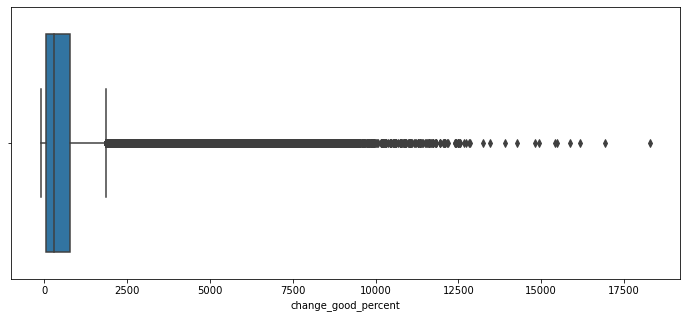

In [115]:
plt.figure(figsize = (12, 5))
sns.boxplot(goods_price.change_good_percent[goods_price['change_good_percent'] != np.inf])

plt.show()

In [116]:
goods_price.change_good_percent[goods_price['change_good_percent'] != np.inf].min()

-98.0

- `NAME_CONTRACT_TYPE`

In [117]:
df_merged.head()

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,Age,Years_Employed,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,NAME_YIELD_GROUP
0,Y,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1.0,2,2,Business Entity Type 3,25,2,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,Stone,24.0,low_normal
1,N,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,2.0,1,1,School,45,3,Cash loans,98356.995,900000.0,1035882.0,900000.0,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,Credit and cash offices,12.0,low_normal
2,N,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,2.0,1,1,School,45,3,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,Stone,6.0,middle
3,N,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,2.0,1,1,School,45,3,Consumer loans,6737.310,68809.5,68053.5,68809.5,XAP,Approved,2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,Country-wide,12.0,middle
4,N,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1.0,2,2,Government,52,1,Consumer loans,5357.250,24282.0,20106.0,24282.0,XAP,Approved,815,Cash through the bank,XAP,New,Mobile,POS,Regional / Local,4.0,middle


<AxesSubplot:xlabel='NAME_CONTRACT_TYPE_x', ylabel='count'>

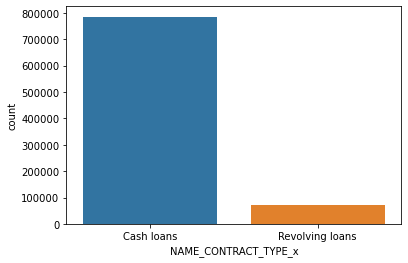

In [118]:
sns.countplot(df_merged.NAME_CONTRACT_TYPE_x)

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE_y', ylabel='count'>

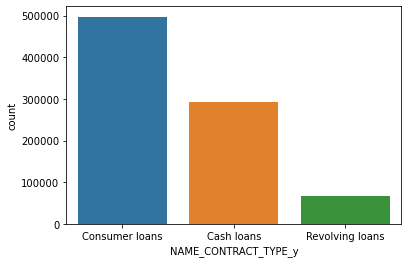

In [119]:
sns.countplot(df_merged.NAME_CONTRACT_TYPE_y)

In [120]:
df_merged.NAME_CONTRACT_TYPE_y.value_counts()

Consumer loans     497273
Cash loans         292825
Revolving loans     66663
Name: NAME_CONTRACT_TYPE_y, dtype: int64

In [121]:
df_merged.NAME_CONTRACT_TYPE_x.value_counts()

Cash loans         785612
Revolving loans     71149
Name: NAME_CONTRACT_TYPE_x, dtype: int64

How many people switched their contract type?

In [122]:
df_merged[(df_merged.NAME_CONTRACT_TYPE_y !=  df_merged.NAME_CONTRACT_TYPE_x)].shape[0]

578389

How many people stayed on their same contract?

In [123]:
df_merged[(df_merged.NAME_CONTRACT_TYPE_y ==  df_merged.NAME_CONTRACT_TYPE_x)].shape[0]

278372

% of change in contract

In [124]:
round(578389/len(df_merged) * 100, 2)

67.51

**Finding the factors on which if loan given to an individual is a profitable business for the bank versus where providing loan to an individual is a complete loss as customer can't bear the EMI's**

In [125]:
df_merged.head()

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,Age,Years_Employed,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,NAME_YIELD_GROUP
0,Y,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1.0,2,2,Business Entity Type 3,25,2,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,Stone,24.0,low_normal
1,N,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,2.0,1,1,School,45,3,Cash loans,98356.995,900000.0,1035882.0,900000.0,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,Credit and cash offices,12.0,low_normal
2,N,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,2.0,1,1,School,45,3,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,Stone,6.0,middle
3,N,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,2.0,1,1,School,45,3,Consumer loans,6737.310,68809.5,68053.5,68809.5,XAP,Approved,2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,Country-wide,12.0,middle
4,N,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1.0,2,2,Government,52,1,Consumer loans,5357.250,24282.0,20106.0,24282.0,XAP,Approved,815,Cash through the bank,XAP,New,Mobile,POS,Regional / Local,4.0,middle


- `CODE_GENDER`: Analysing the data based on Gender

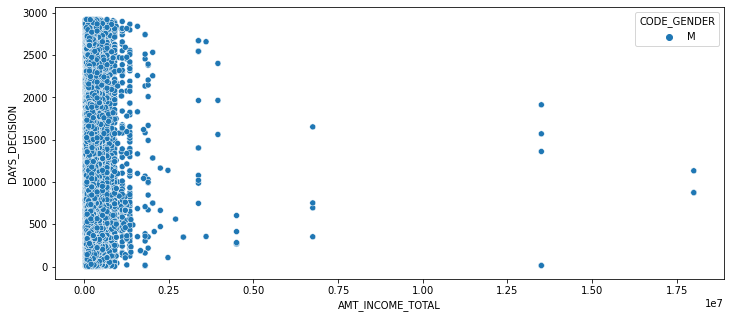

In [126]:
plt.figure(figsize = (12, 5))
sns.scatterplot(df_merged.AMT_INCOME_TOTAL,df_merged.DAYS_DECISION, hue = df_merged.CODE_GENDER[df_merged.CODE_GENDER =="M"])

plt.show()

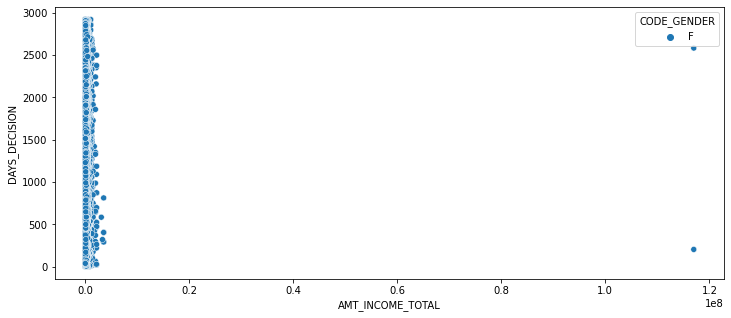

In [127]:
plt.figure(figsize = (12, 5))
sns.scatterplot(df_merged.AMT_INCOME_TOTAL,df_merged.DAYS_DECISION, hue = df_merged.CODE_GENDER[df_merged.CODE_GENDER =="F"])

plt.show()

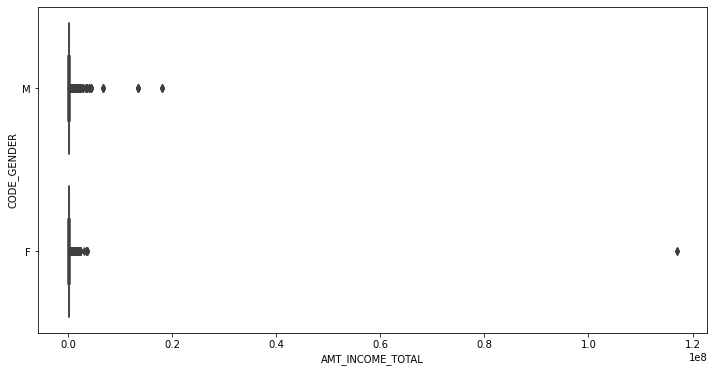

In [128]:
plt.figure(figsize = (12, 6))
sns.boxplot(df_merged.AMT_INCOME_TOTAL, df_merged.CODE_GENDER)

plt.show()

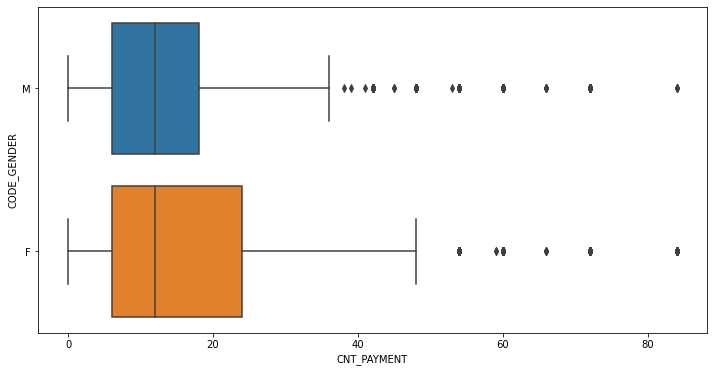

In [129]:
plt.figure(figsize = (12, 6))
sns.boxplot(df_merged.CNT_PAYMENT,df_merged.CODE_GENDER )
plt.show()

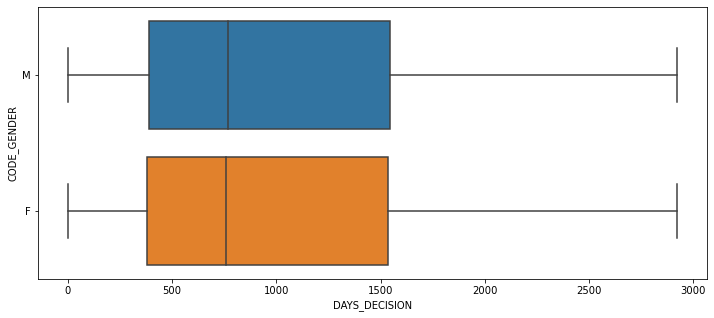

In [130]:
plt.figure(figsize = (12, 5))
sns.boxplot(df_merged.DAYS_DECISION,df_merged.CODE_GENDER )

plt.show()

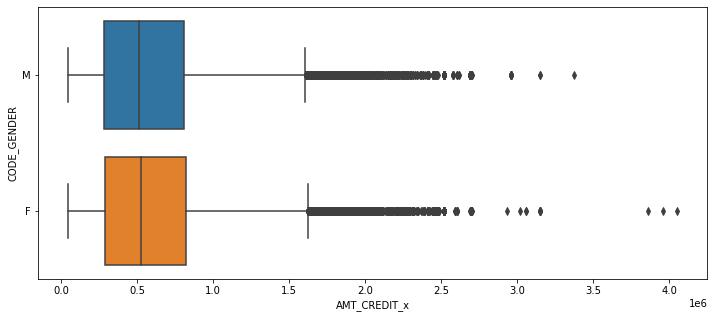

In [131]:
plt.figure(figsize = (12, 5))
sns.boxplot(df_merged.AMT_CREDIT_x,df_merged.CODE_GENDER )

plt.show()

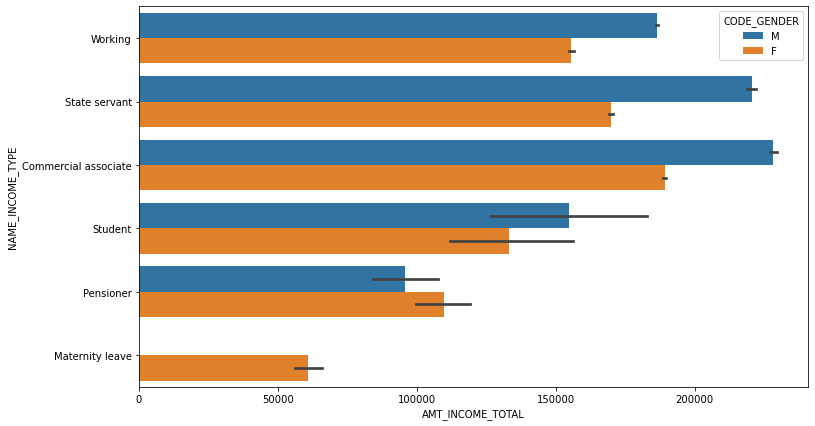

In [132]:
plt.figure(figsize = (12, 7))
sns.barplot(df_merged.AMT_INCOME_TOTAL, df_merged.NAME_INCOME_TYPE,hue = df_merged.CODE_GENDER )

plt.show()

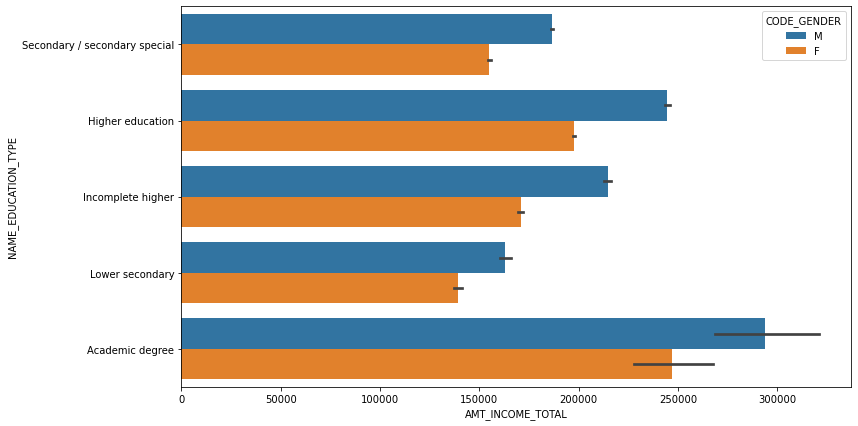

In [133]:
plt.figure(figsize = (12, 7))
sns.barplot(df_merged.AMT_INCOME_TOTAL, df_merged.NAME_EDUCATION_TYPE, hue = df_merged.CODE_GENDER )

plt.show()



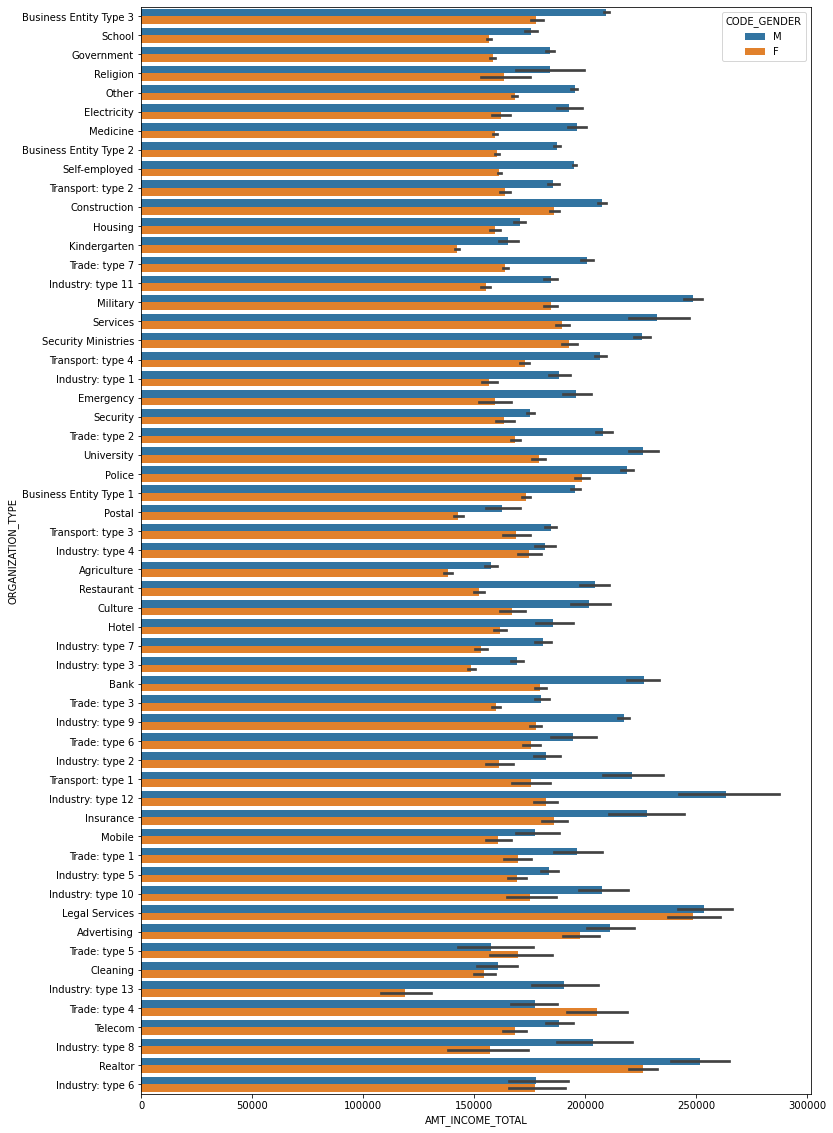

In [134]:
plt.figure(figsize = (12, 20))
sns.barplot(df_merged.AMT_INCOME_TOTAL, df_merged.ORGANIZATION_TYPE, hue = df_merged.CODE_GENDER )

plt.show()

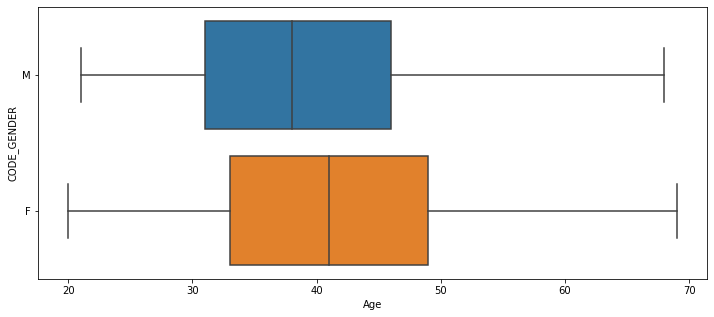

In [135]:
plt.figure(figsize = (12, 5))
sns.boxplot(df_merged.Age, df_merged.CODE_GENDER)

plt.show()

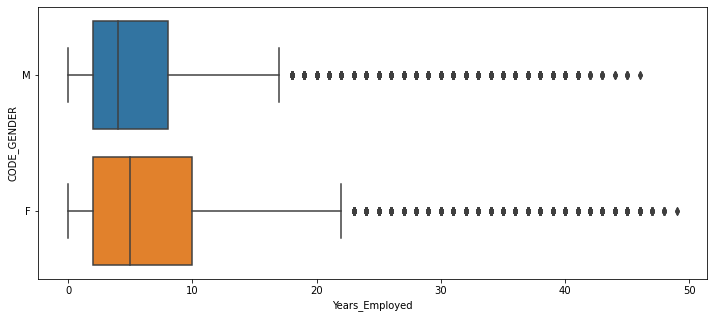

In [136]:
plt.figure(figsize = (12, 5))

sns.boxplot(df_merged.Years_Employed, df_merged.CODE_GENDER)

plt.show()

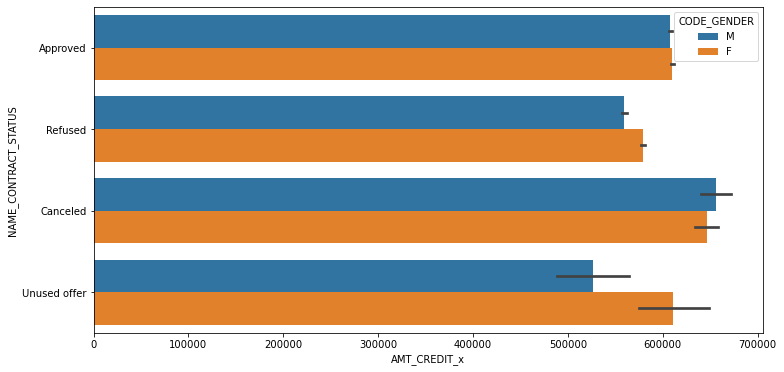

In [137]:


plt.figure(figsize = (12, 6))
sns.barplot(df_merged.AMT_CREDIT_x, df_merged.NAME_CONTRACT_STATUS, hue = df_merged.CODE_GENDER )

plt.show()


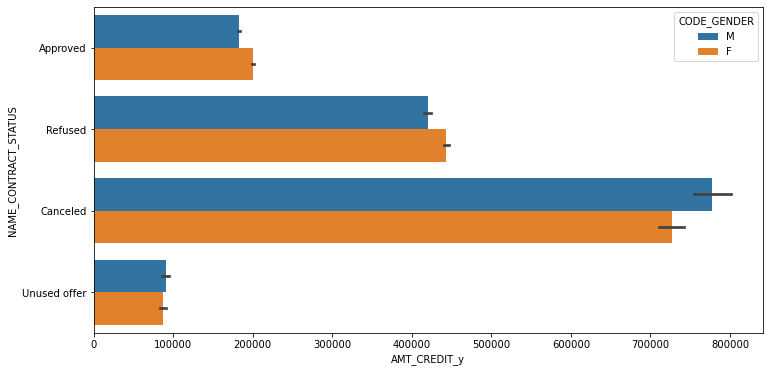

In [138]:


plt.figure(figsize = (12, 6))
sns.barplot(df_merged.AMT_CREDIT_y, df_merged.NAME_CONTRACT_STATUS, hue = df_merged.CODE_GENDER )

plt.show()


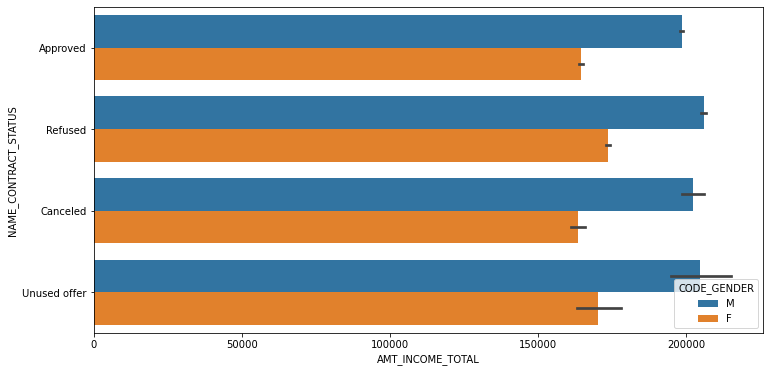

In [139]:
plt.figure(figsize = (12, 6))
sns.barplot(df_merged.AMT_INCOME_TOTAL, df_merged.NAME_CONTRACT_STATUS, hue = df_merged.CODE_GENDER )

plt.show()

Which type of Contract Type is the most profitable?

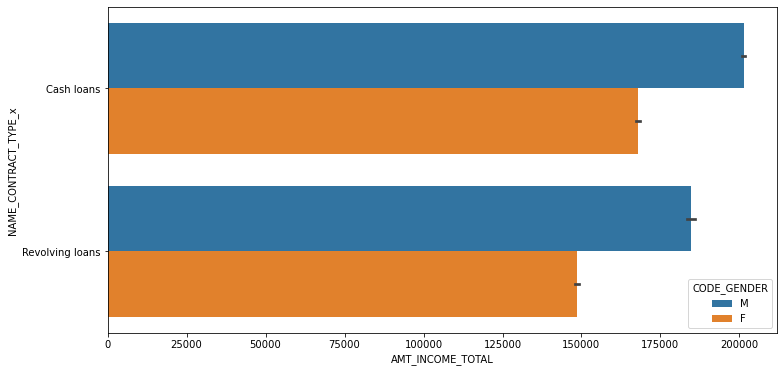

In [140]:
plt.figure(figsize = (12, 6))
sns.barplot(df_merged.AMT_INCOME_TOTAL, df_merged.NAME_CONTRACT_TYPE_x, hue = df_merged.CODE_GENDER )

plt.show()

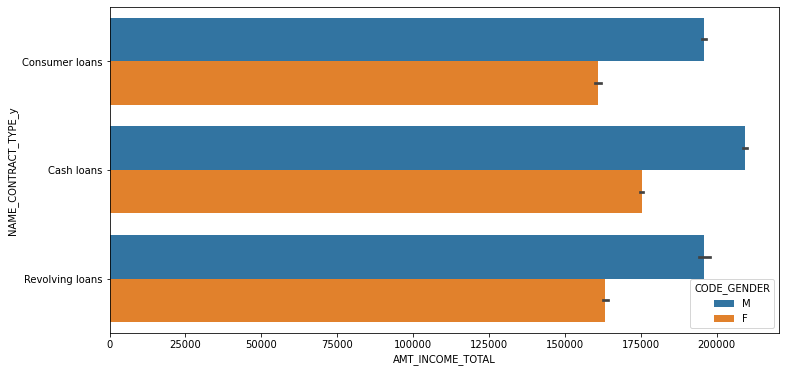

In [141]:
plt.figure(figsize = (12, 6))
sns.barplot(df_merged.AMT_INCOME_TOTAL, df_merged.NAME_CONTRACT_TYPE_y, hue = df_merged.CODE_GENDER )

plt.show()

Which type of income type are good customers?

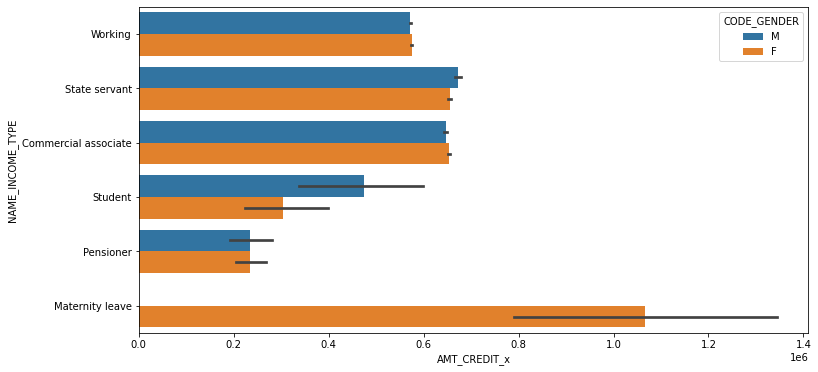

In [142]:
plt.figure(figsize = (12, 6))
sns.barplot(df_merged.AMT_CREDIT_x, df_merged.NAME_INCOME_TYPE, hue = df_merged.CODE_GENDER )

plt.show()

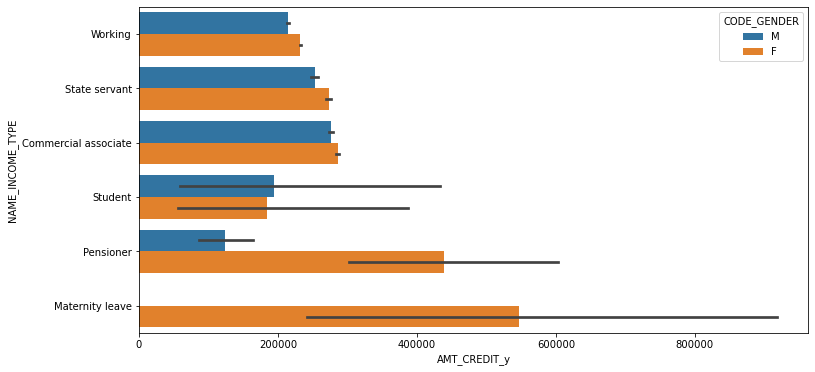

In [143]:
plt.figure(figsize = (12, 6))
sns.barplot(df_merged.AMT_CREDIT_y, df_merged.NAME_INCOME_TYPE, hue = df_merged.CODE_GENDER )

plt.show()

If a person who their owns shelter, best customers?

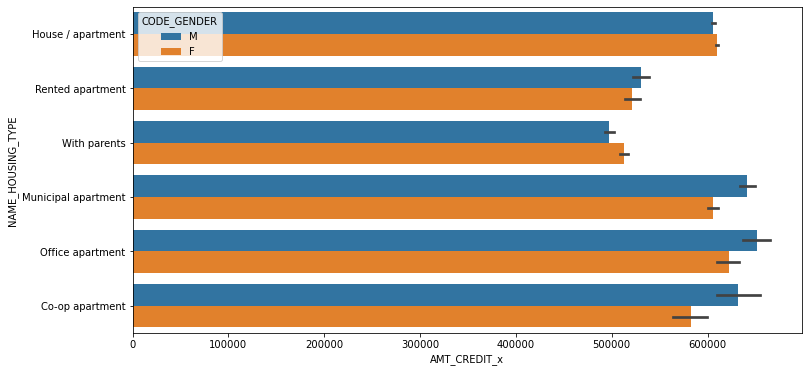

In [144]:
plt.figure(figsize = (12, 6))
sns.barplot(df_merged.AMT_CREDIT_x, df_merged.NAME_HOUSING_TYPE, hue = df_merged.CODE_GENDER )

plt.show()

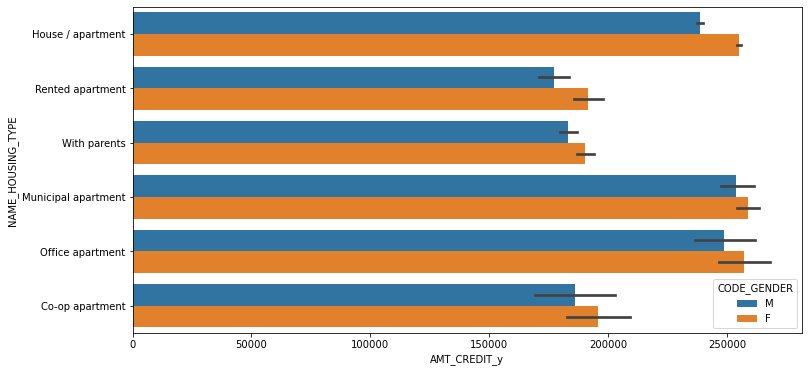

In [145]:
plt.figure(figsize = (12, 6))
sns.barplot(df_merged.AMT_CREDIT_y, df_merged.NAME_HOUSING_TYPE, hue = df_merged.CODE_GENDER )

plt.show()

Which organization people are profitable customers?

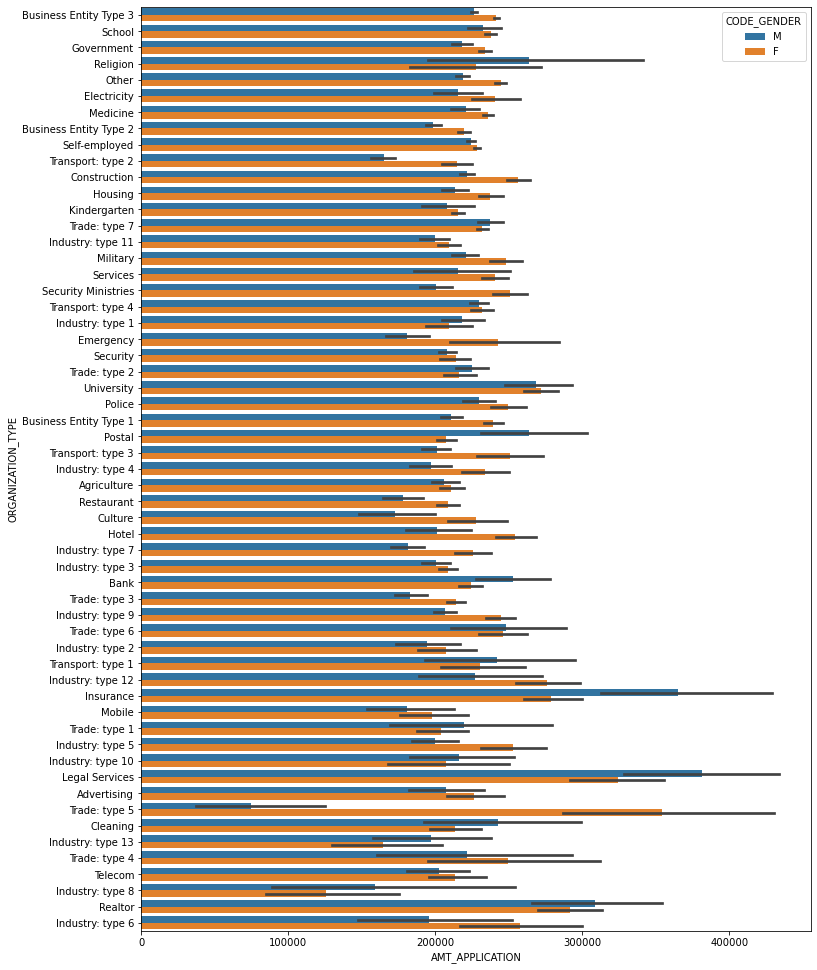

In [146]:
plt.figure(figsize = (12, 17))
sns.barplot(df_merged.AMT_APPLICATION, df_merged.ORGANIZATION_TYPE, hue = df_merged.CODE_GENDER )

plt.show()

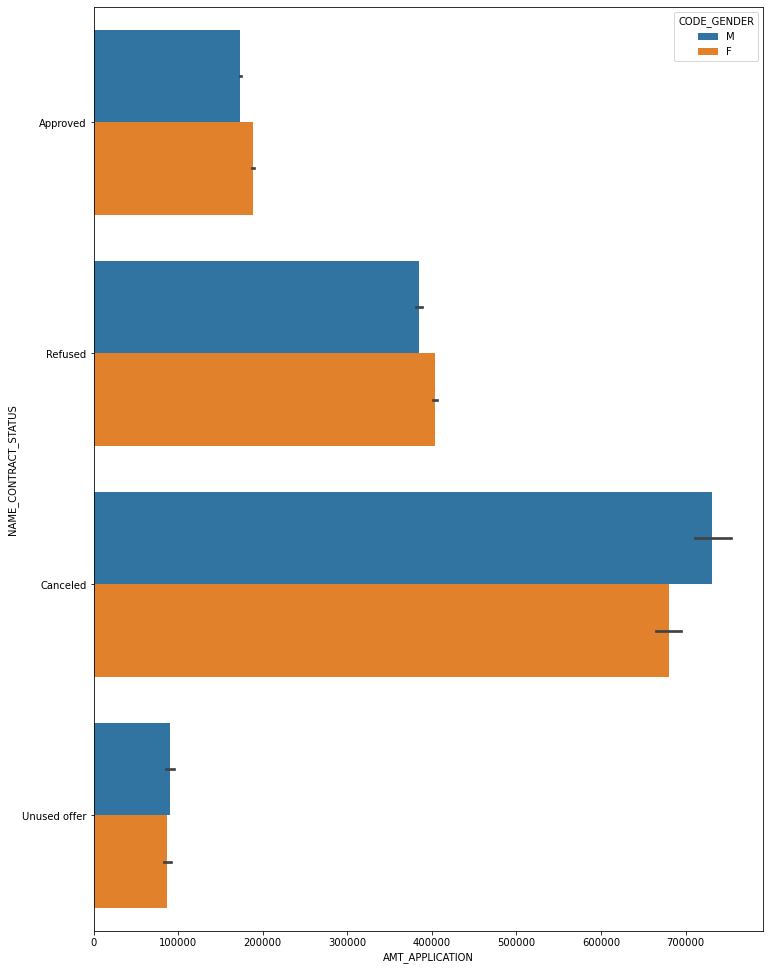

In [147]:
plt.figure(figsize = (12, 17))
sns.barplot(df_merged.AMT_APPLICATION, df_merged.NAME_CONTRACT_STATUS, hue = df_merged.CODE_GENDER )

plt.show()


Channel type to onboard profitable customers?

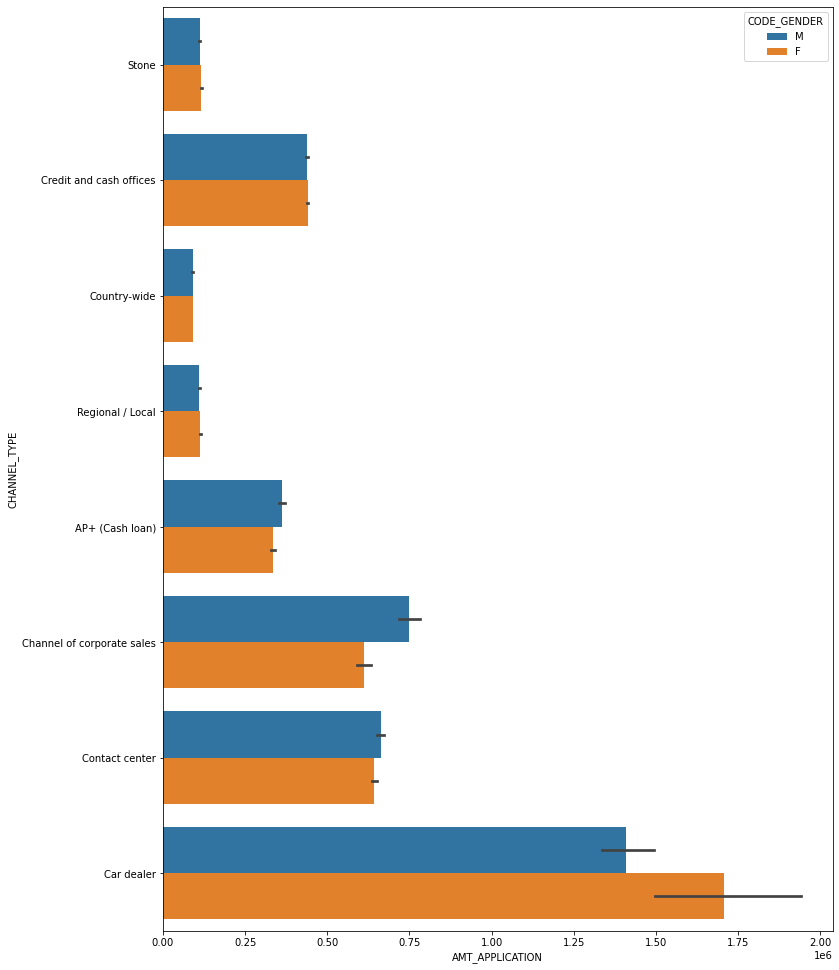

In [149]:
plt.figure(figsize = (12, 17))
sns.barplot(df_merged.AMT_APPLICATION, df_merged.CHANNEL_TYPE, hue = df_merged.CODE_GENDER )

plt.show()

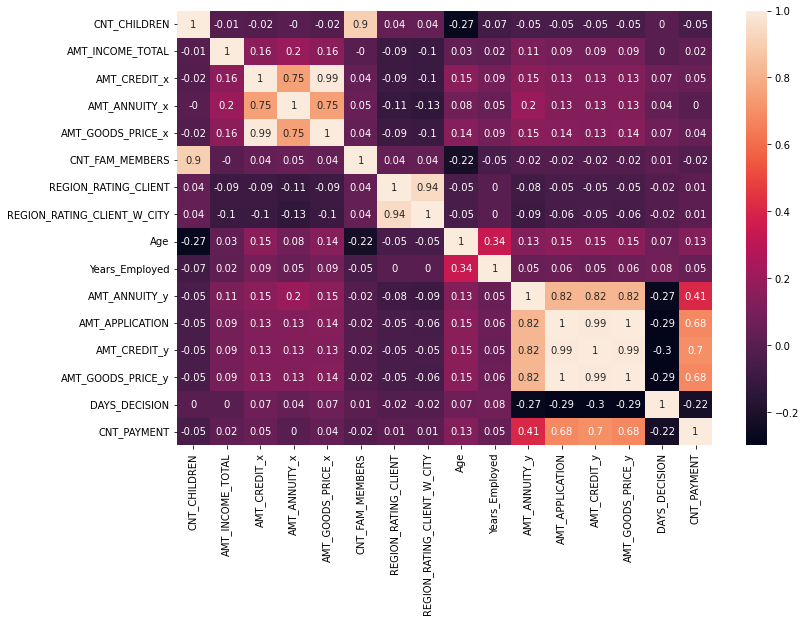

In [150]:
plt.figure(figsize = (12, 8))
sns.heatmap(round(df_merged.corr(), 2), annot = True)
plt.show()

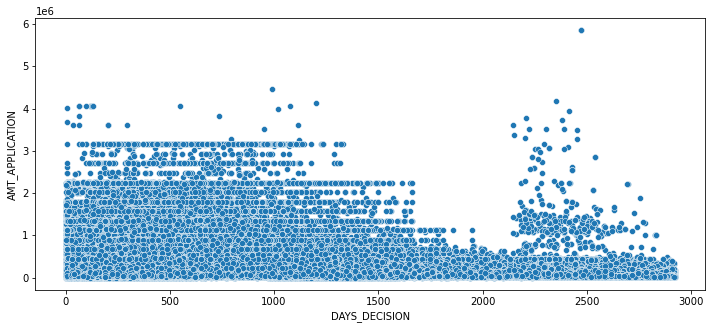

In [151]:
plt.figure(figsize = (12, 5))
sns.scatterplot(df_merged.DAYS_DECISION, df_merged.AMT_APPLICATION)

plt.show()

In [152]:
df_merged.DAYS_DECISION.describe()

count    856761.000000
mean       1020.506997
std         787.323106
min           1.000000
25%         382.000000
50%         762.000000
75%        1540.000000
max        2922.000000
Name: DAYS_DECISION, dtype: float64

Let's analyse the application amount on the occassion where loan amount took 2500 days or more to decide

In [153]:
days_2500 = df_merged[df_merged.DAYS_DECISION >= 2500]

In [157]:
round(days_2500.TARGET.value_counts(normalize = True)*100, 2)

N    93.19
Y     6.81
Name: TARGET, dtype: float64

In [158]:
days_2500

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,Age,Years_Employed,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,NAME_YIELD_GROUP
18,N,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,2.0,2,2,Other,46,4,Consumer loans,8019.090,44455.5,39955.5,44455.5,XAP,Approved,2536,Cash through the bank,XAP,New,Mobile,POS,Country-wide,6.0,low_normal
48,N,Revolving loans,F,N,Y,1,81000.0,270000.0,13500.0,270000.0,Working,Secondary / secondary special,Married,House / apartment,3.0,2,2,Construction,26,0,Consumer loans,2709.450,22428.0,13500.0,22428.0,XAP,Approved,2811,Cash through the bank,XAP,New,Mobile,POS,Country-wide,6.0,low_normal
67,N,Cash loans,F,N,Y,0,90000.0,225000.0,11074.5,225000.0,Working,Secondary / secondary special,Married,House / apartment,2.0,2,2,Business Entity Type 3,52,10,Consumer loans,3140.460,33660.0,33660.0,33660.0,XAP,Refused,2688,XNA,SCO,Repeater,XNA,POS,Stone,12.0,low_normal
68,N,Cash loans,F,N,Y,0,90000.0,225000.0,11074.5,225000.0,Working,Secondary / secondary special,Married,House / apartment,2.0,2,2,Business Entity Type 3,52,10,Consumer loans,3140.460,33660.0,33660.0,33660.0,XAP,Refused,2689,XNA,SCO,Repeater,XNA,POS,Stone,12.0,low_normal
69,N,Cash loans,F,N,Y,0,90000.0,225000.0,11074.5,225000.0,Working,Secondary / secondary special,Married,House / apartment,2.0,2,2,Business Entity Type 3,52,10,Consumer loans,3140.460,33660.0,33660.0,33660.0,XAP,Refused,2689,XNA,SCO,Repeater,XNA,POS,Stone,12.0,low_normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856667,N,Cash loans,F,Y,N,0,540000.0,545040.0,35617.5,450000.0,Commercial associate,Secondary / secondary special,Married,Rented apartment,2.0,1,1,Business Entity Type 3,35,1,Consumer loans,6127.380,56610.0,55152.0,56610.0,XAP,Approved,2717,XNA,XAP,Repeater,Photo / Cinema Equipment,POS,Country-wide,10.0,low_normal
856705,N,Cash loans,M,Y,N,0,180000.0,808650.0,23773.5,675000.0,Working,Higher education,Married,House / apartment,2.0,2,2,Business Entity Type 3,57,20,Consumer loans,4797.450,18112.5,16839.0,18112.5,XAP,Approved,2919,Cash through the bank,XAP,New,Mobile,POS,Country-wide,4.0,low_normal
856743,N,Cash loans,F,N,Y,0,112500.0,345510.0,17770.5,247500.0,Commercial associate,Higher education,Single / not married,House / apartment,1.0,2,2,Bank,32,1,Consumer loans,7544.970,34353.0,32188.5,34353.0,XAP,Approved,2873,Cash through the bank,XAP,Repeater,Mobile,POS,Country-wide,5.0,low_normal
856746,N,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,225000.0,Working,Secondary / secondary special,Separated,House / apartment,1.0,2,2,Self-employed,45,20,Consumer loans,8417.340,39960.0,41940.0,39960.0,XAP,Approved,2680,Cash through the bank,XAP,New,Mobile,POS,Country-wide,6.0,high


In [161]:
days_2500.NAME_CONTRACT_STATUS.value_counts(normalize = True) *100

Approved    84.575758
Refused     15.389118
Canceled     0.035124
Name: NAME_CONTRACT_STATUS, dtype: float64

In [162]:
days_2500.CODE_GENDER.value_counts(normalize = True) *100

F    62.19706
M    37.80294
Name: CODE_GENDER, dtype: float64

In [184]:
np.percentile(days_2500.AMT_INCOME_TOTAL, 99.95)

1125000.0

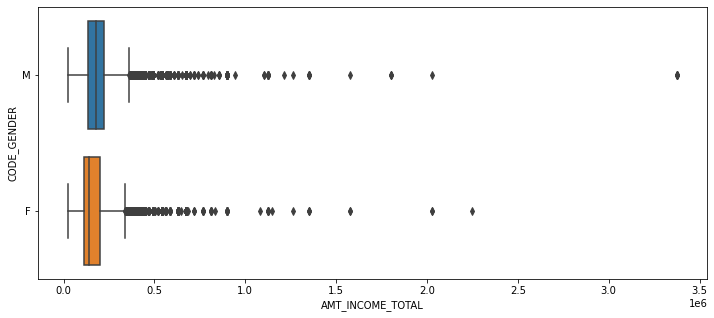

In [194]:
plt.figure(figsize = (12, 5))
sns.boxplot(days_2500.AMT_INCOME_TOTAL[days_2500.AMT_INCOME_TOTAL < 3600000.0], days_2500.CODE_GENDER)
plt.show()

In [200]:
days_2500.AMT_CREDIT_x.describe()/10000

count      5.978900
mean      64.676878
std       40.375253
min        4.500000
25%       31.405500
50%       55.527300
75%       90.000000
max      296.100000
Name: AMT_CREDIT_x, dtype: float64

In [201]:
days_2500.AMT_CREDIT_y.describe()/10000

count      5.978900
mean       6.354728
std        6.824719
min        0.556200
25%        2.600100
50%        4.200750
75%        7.624350
max      284.452650
Name: AMT_CREDIT_y, dtype: float64

<AxesSubplot:xlabel='CNT_PAYMENT', ylabel='CODE_GENDER'>

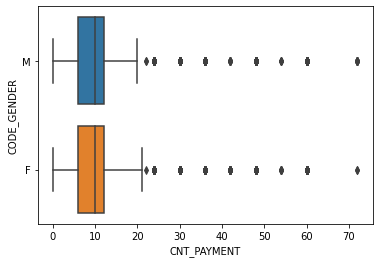

In [207]:
sns.boxplot(days_2500.CNT_PAYMENT,days_2500.CODE_GENDER )

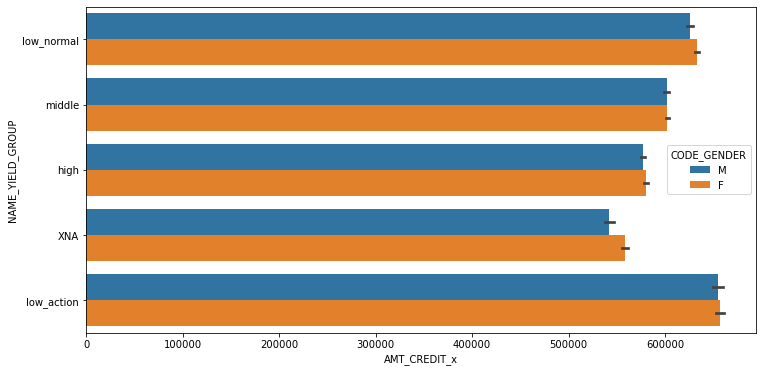

In [210]:
plt.figure(figsize = (12, 6))
sns.barplot(df_merged.AMT_CREDIT_x, df_merged.NAME_YIELD_GROUP, hue = df_merged.CODE_GENDER )

plt.show()



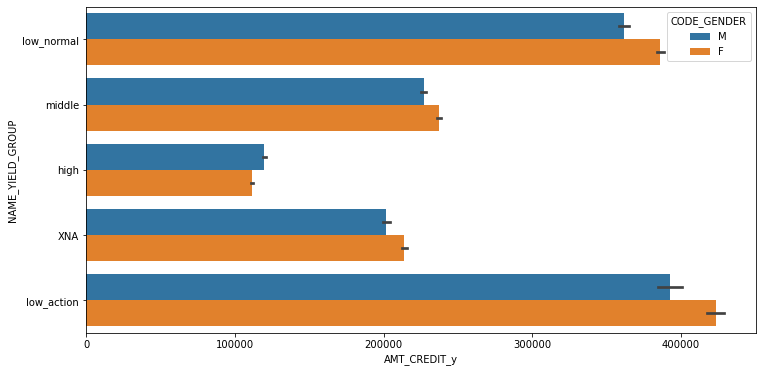

In [211]:
plt.figure(figsize = (12, 6))
sns.barplot(df_merged.AMT_CREDIT_y, df_merged.NAME_YIELD_GROUP, hue = df_merged.CODE_GENDER )

plt.show()



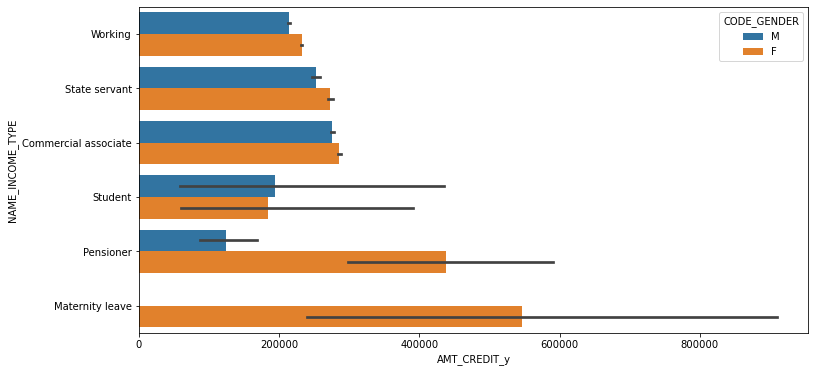

In [213]:
plt.figure(figsize = (12, 6))
sns.barplot(df_merged.AMT_CREDIT_y, df_merged.NAME_INCOME_TYPE, hue = df_merged.CODE_GENDER )

plt.show()



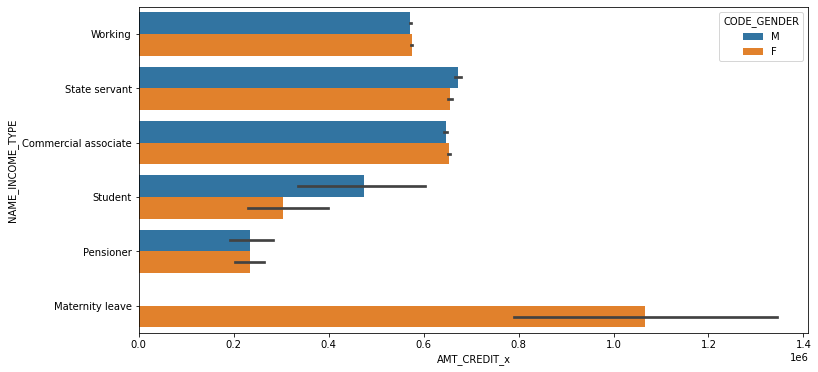

In [214]:
plt.figure(figsize = (12, 6))
sns.barplot(df_merged.AMT_CREDIT_x, df_merged.NAME_INCOME_TYPE, hue = df_merged.CODE_GENDER )

plt.show()



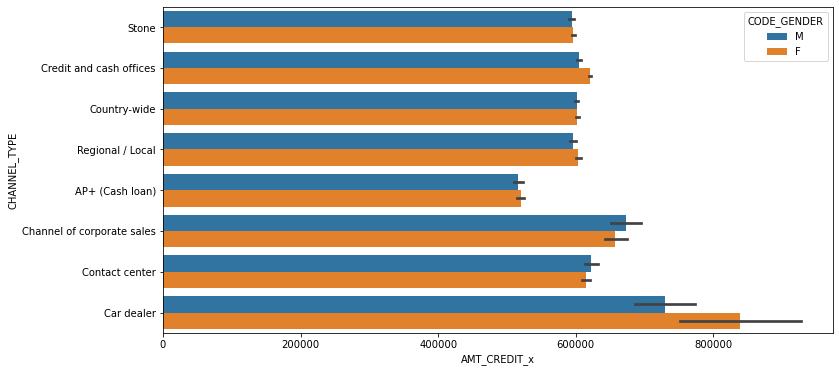

In [215]:
plt.figure(figsize = (12, 6))
sns.barplot(df_merged.AMT_CREDIT_x, df_merged.CHANNEL_TYPE, hue = df_merged.CODE_GENDER )

plt.show()





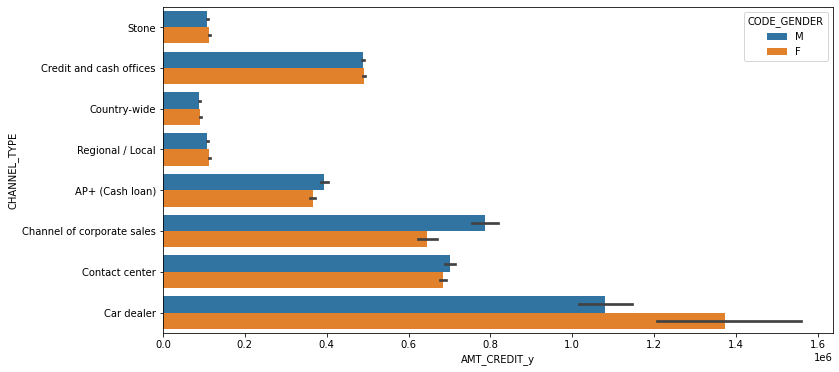

In [216]:
plt.figure(figsize = (12, 6))
sns.barplot(df_merged.AMT_CREDIT_y, df_merged.CHANNEL_TYPE, hue = df_merged.CODE_GENDER )

plt.show()





Surge percentage in the loan amount compared to the previous loan amount

In [206]:
df_merged.AMT_CREDIT_y.sum()/df_merged.AMT_CREDIT_x.sum() * 100

40.66059958641242